In [244]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



survey_raw = pd.read_csv('../Stack Overflow 2021 Survey - EDA/stack-overflow-developer-survey-2021/survey_results_public.csv')
schema_raw = pd.read_csv('../Stack Overflow 2021 Survey - EDA/stack-overflow-developer-survey-2021/survey_results_schema.csv')

#These are the questions on the survey
schema_raw


,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [245]:
#These are the response data columns from the survey
survey_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

### Data Cleaning and Preparation

We're interested in:
- Where the respondents live
- What langauges are being used.
- Salary By:
    - Experience
    - Country



In [246]:
# Create List of Survey Fields of Interest 
selected_fields = [
    #Respondent Index
    'ResponseId',
    # Demographic Fields
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # Programming experience Fields
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    # Employment Fields
    'Employment',
    'ConvertedCompYearly',
    'CompFreq'
    ,'DevType'
]

survey_df = survey_raw[selected_fields]
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ResponseId               83439 non-null  int64  
 1   Country                  83439 non-null  object 
 2   Age                      82407 non-null  object 
 3   Gender                   82286 non-null  object 
 4   EdLevel                  83126 non-null  object 
 5   Age1stCode               83243 non-null  object 
 6   YearsCode                81641 non-null  object 
 7   YearsCodePro             61216 non-null  object 
 8   LanguageHaveWorkedWith   82357 non-null  object 
 9   LanguageWantToWorkWith   76821 non-null  object 
 10  ToolsTechHaveWorkedWith  72537 non-null  object 
 11  Employment               83323 non-null  object 
 12  ConvertedCompYearly      46844 non-null  float64
 13  CompFreq                 52150 non-null  object 
 14  DevType               

In [247]:
survey_df.Age.value_counts().sort_index(ascending=True)

18-24 years old       20993
25-34 years old       32568
35-44 years old       15183
45-54 years old        5472
55-64 years old        1819
65 years or older       421
Prefer not to say       575
Under 18 years old     5376
Name: Age, dtype: int64

In [265]:
# Select the Related Question for the Fields Selected
questions = schema_raw.qname.isin(
    [# Demographic Fields
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # Programming experience Fields
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'Language',
    'ToolsTech',
    # Employment Fields
    'Employment',
    'CompTotal'
    ,'DevType']
)
schema_df = schema_raw[questions].set_index('qname')['question']
schema_df

qname
Employment      Which of the following best describes your cur...
Country         Where do you live? <span style="font-weight: b...
EdLevel         Which of the following best describes the high...
Age1stCode      At what age did you write your first line of c...
YearsCode       Including any education, how many years have y...
YearsCodePro    NOT including education, how many years have y...
DevType         Which of the following describes your current ...
CompTotal       What is your current total compensation (salar...
Language        Which <b>programming, scripting, and markup la...
ToolsTech       Which <strong>tools</strong> have you done ext...
Age                                             What is your age?
Gender          Which of the following describe you, if any? P...
Name: question, dtype: object

## Exploratory Data Analysis and Visualitzation
Let's start the looking at the demographics of the survey respondent demographics by country, age, gender and education.


### Country
Let's look at the Top 10 Countries with the highest number of respondents.

In [249]:
# The Countries with the Most Respondents

top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Name: Country, dtype: int64

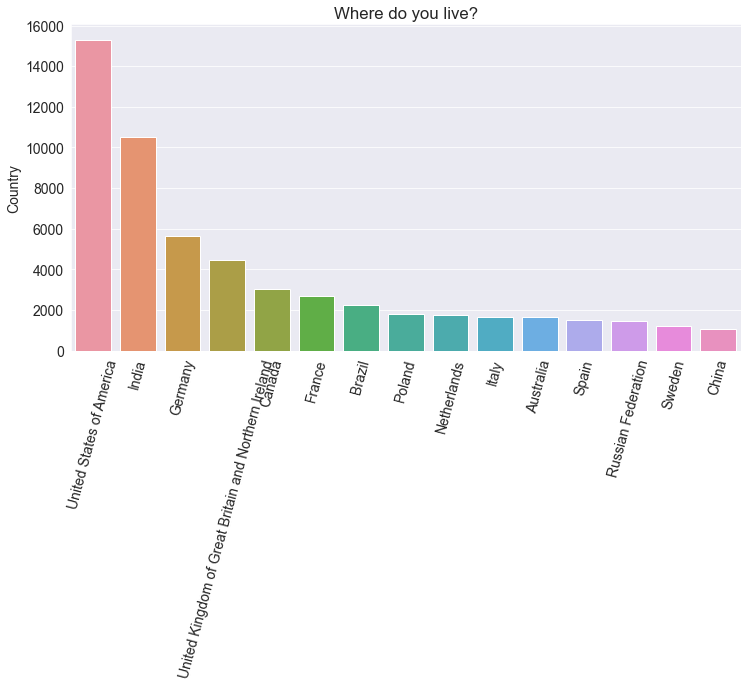

In [250]:
# Chart Style Settings
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Where do you live?')
sns.barplot(x=top_countries.index, y=top_countries);


### Age
Let's look at the age distribution of the respondents

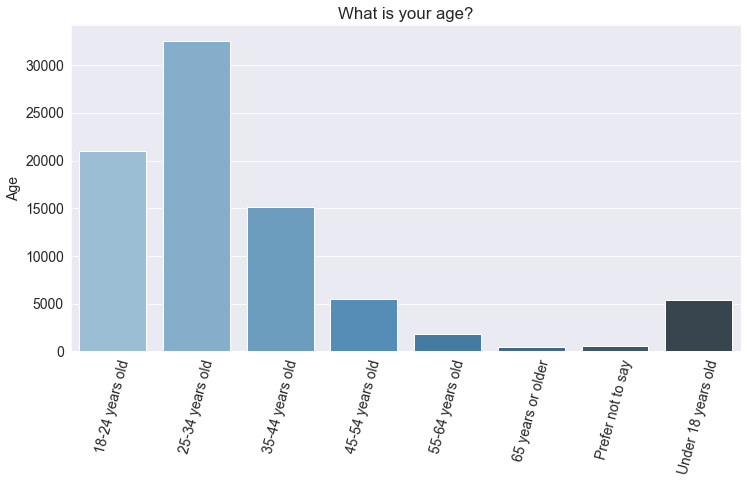

In [251]:
age_groups = survey_df.Age.value_counts().sort_index(ascending=True)

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df.Age)
sns.color_palette("mako", as_cmap=True)
sns.barplot(x=age_groups.index, y=age_groups, palette="Blues_d");

### Gender
Let's take a look at the respondents by gender.

In [252]:
survey_df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

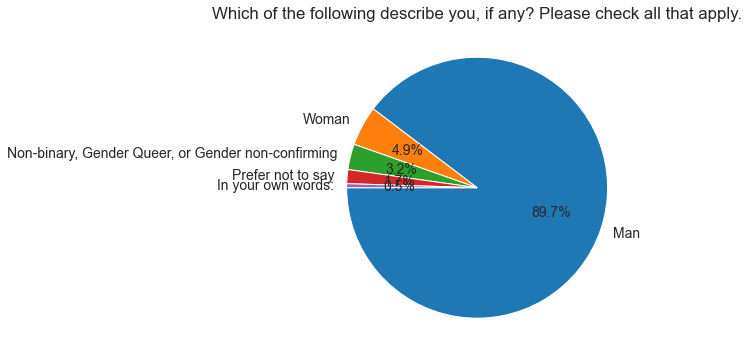

In [253]:
def pie_group(row):
    if row.Gender == 'Man':
        return 'Man'
    elif row.Gender == 'Woman':
        return 'Woman'
    elif row.Gender == 'Prefer not to say':
        return 'Prefer not to say'
    elif row.Gender == 'Or, in your own words:':
        return 'In your own words:'
    else:
        return "Non-binary, Gender Queer, or Gender non-confirming"

gender_df = survey_df.apply(pie_group, axis= 'columns')
gender_counts = gender_df.value_counts()

plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [254]:
#survey_df['Employment']
schema_df.Employment

'Which of the following best describes your current <b>employment status</b>?'

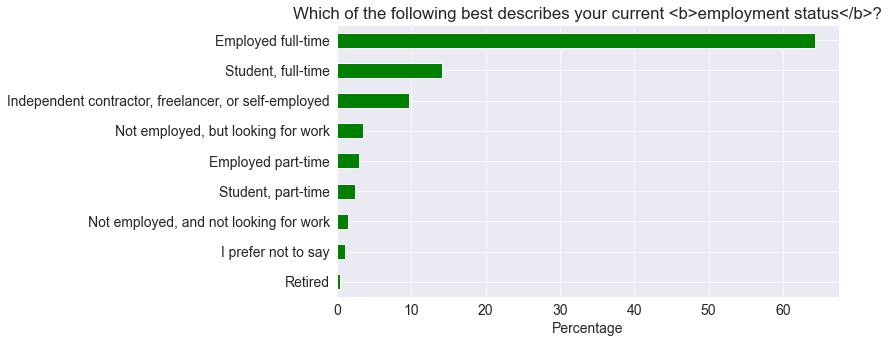

In [255]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_df.Employment)
plt.xlabel('Percentage');

In [256]:
survey_df.LanguageHaveWorkedWith

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

In [257]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

languages_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
languages_df 

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Groovy,Clojure,APL,LISP,F#,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


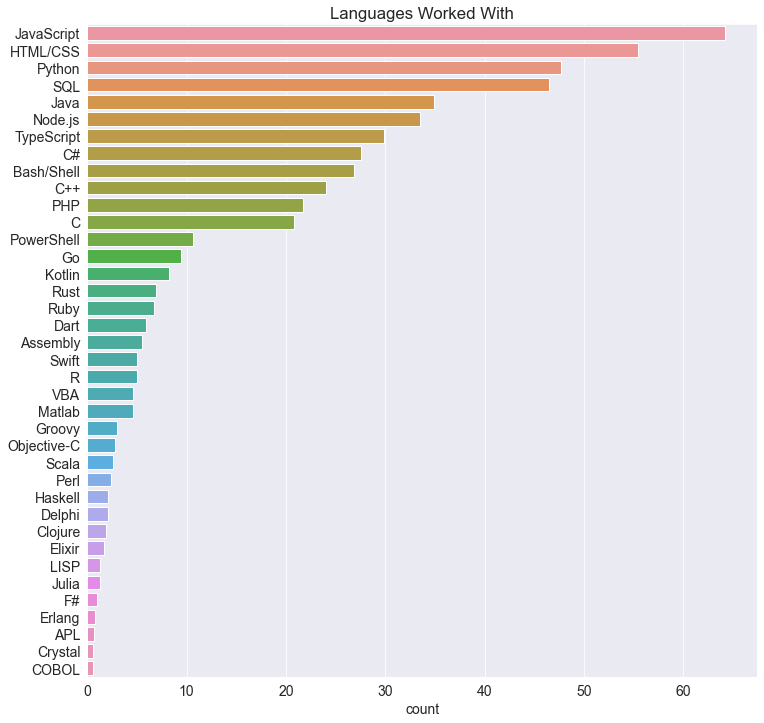

In [300]:
languages_worked_percentages = languages_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages Worked With");
plt.xlabel('count');

In [259]:
survey_df.Age1stCode

0        18 - 24 years
1        11 - 17 years
2        11 - 17 years
3        11 - 17 years
4         5 - 10 years
             ...      
83434    11 - 17 years
83435    11 - 17 years
83436    11 - 17 years
83437    11 - 17 years
83438    11 - 17 years
Name: Age1stCode, Length: 83439, dtype: object

In [289]:
top_responding_countries = survey_df.Country.value_counts().head(75).index
filt = survey_df['Country'].isin(top_responding_countries)
country_comp_df = survey_df[filt]

country_comp = country_comp_df.groupby(['Country'])['ConvertedCompYearly'].median().sort_values(ascending=False).head(20)
country_comp

Country
United States of America                                125000.0
Israel                                                  108564.0
Switzerland                                             101649.0
Ireland                                                  86478.0
Denmark                                                  85536.0
Norway                                                   80922.0
Australia                                                80172.0
Canada                                                   75631.0
United Kingdom of Great Britain and Northern Ireland     74970.0
New Zealand                                              70279.0
Germany                                                  64859.0
Singapore                                                64548.0
Japan                                                    62950.0
Finland                                                  60972.0
Netherlands                                              59676.0
Saudi Arabia     

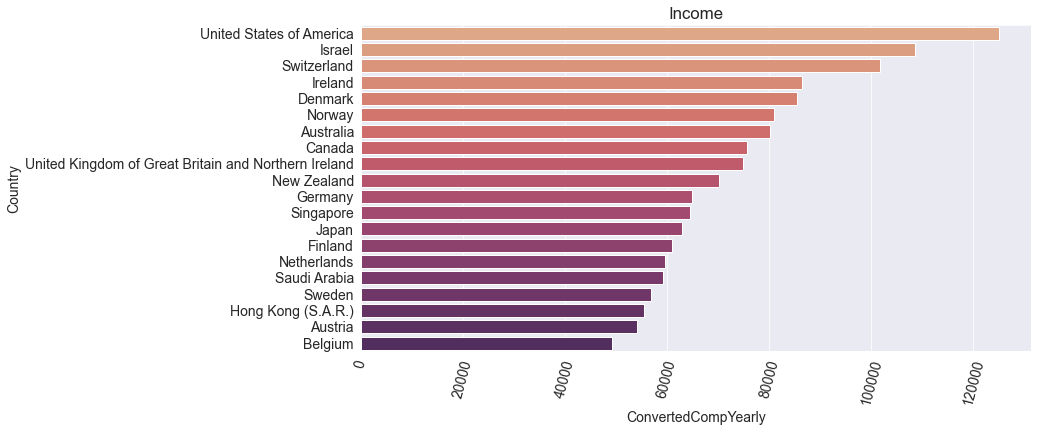

In [296]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Income')
sns.barplot(y=country_comp.index, x=country_comp,palette='flare');

In [273]:
survey_df.loc[survey_df.Country=='San Marino']

,ResponseId,Country,Age,Gender,EdLevel,Age1stCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,ToolsTechHaveWorkedWith,Employment,ConvertedCompYearly,CompFreq,DevType
43618,43619,San Marino,35-44 years old,Man,Some college/university study without earning ...,11 - 17 years,22,14,Assembly;Java;JavaScript;Matlab;PHP;SQL,JavaScript;PHP;SQL,Docker;Git,Employed full-time,NaN,NaN,"Developer, back-end;Database administrator;Dev..."
49433,49434,San Marino,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",55 - 64 years,35,30,C;COBOL;HTML/CSS;Java;JavaScript;SQL;VBA,Go;Java;JavaScript;TypeScript,NaN,Employed full-time,596700.0,Monthly,"Developer, full-stack"


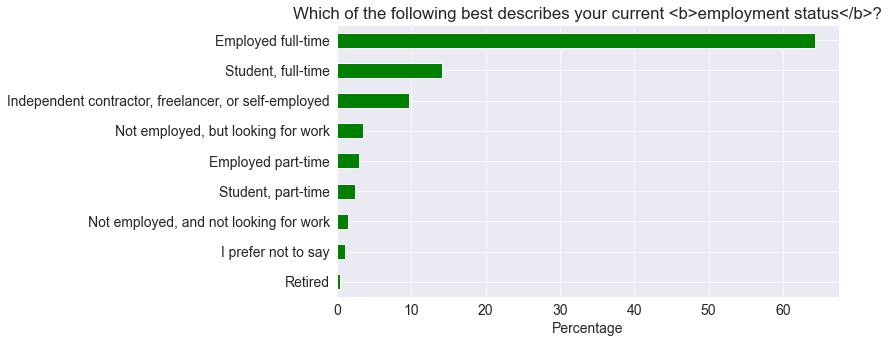

In [299]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_df.Employment)
plt.xlabel('Percentage');